# Extreme Value Analysis

In [1]:
import matplotlib
%matplotlib inline
import pandas as pd
from statista.distributions import ConfidenceInterval, PlottingPosition, Distributions

In [3]:
# import os
time_series1 = pd.read_csv("../data/time_series1.txt", header=None)[0].tolist()
time_series2 = pd.read_csv("../data/time_series2.txt", header=None)[0].tolist()

In [4]:
print(time_series1)

[15.999737471905252, 16.10571623488743, 17.947809230275304, 16.14775206414929, 15.991427126788327, 16.687542227378565, 17.12513922944536, 19.39645340792385, 16.837044960487795, 15.804473320190723, 16.018569387471025, 16.60087672428902, 16.16130698520315, 17.338636901595873, 18.477371969176406, 17.89723672222028, 16.626465201654593, 16.196548622931672, 16.013794215070927, 16.30367884232831, 17.182106070966608, 18.98456693176845, 16.885737663740024, 16.088051117522948, 15.790480003140171, 18.160947973898388, 18.31815885337604]


# Gumbel Distribution

### Maximum-Likelihood-method

#### Fit the data to the gumbel distribution and estimate parameters using Maximum-Likelihood-method

In [5]:
gumbel_series_1 = Distributions("Gumbel", time_series1)
# defult parameter estimation method is maximum liklihood method
param_mle_series_1 = gumbel_series_1.fit_model(method="mle")
gumbel_series_1.ks()
gumbel_series_1.chisquare()
print(param_mle_series_1)

-----KS Test--------
Statistic = 0.18518518518518517
Accept Hypothesis
P value = 0.7536974563793281
-----KS Test--------
Statistic = 0.18518518518518517
Accept Hypothesis
P value = 0.7536974563793281
-----chisquare Test-----
Statistic = -28.899809016096718
P value = 1.0
{'loc': np.float64(16.470245610977667), 'scale': 0.7244863131189486}


#### Calculate and plot the probability distribution function (pdf)

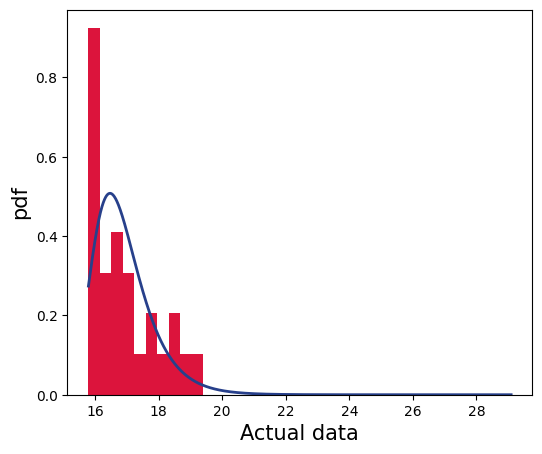

In [6]:
pdf, fig, ax = gumbel_series_1.pdf(plot_figure=True)

#### Calculate and plot the cumulative distribution function (cdf)

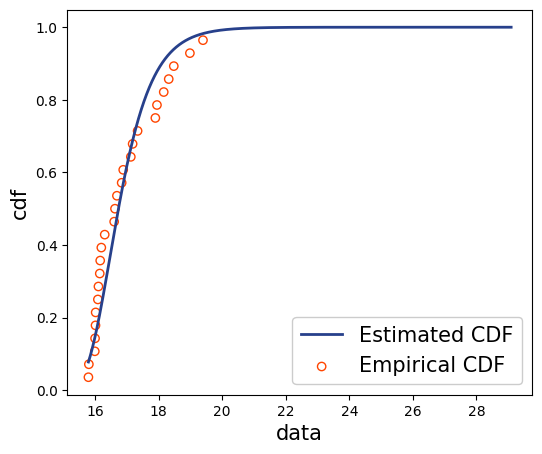

In [7]:
cdf, _, _ = gumbel_series_1.cdf(plot_figure=True)

### Lmoments

#### Fit the data to the gumbel distribution and estimate parameters using the Lmoments method.

In [8]:
param_lmoments_series_1 = gumbel_series_1.fit_model(method="lmoments")
gumbel_series_1.ks()
gumbel_series_1.chisquare()
print(param_lmoments_series_1)

-----KS Test--------
Statistic = 0.14814814814814814
Accept Hypothesis
P value = 0.9356622290518453
-----KS Test--------
Statistic = 0.14814814814814814
Accept Hypothesis
P value = 0.9356622290518453
-----chisquare Test-----
Statistic = -28.899809016097002
P value = 1.0
{'loc': np.float64(16.44841695242862), 'scale': np.float64(0.8328854157603985)}


#### Calculate and plot the probability distribution function (pdf)

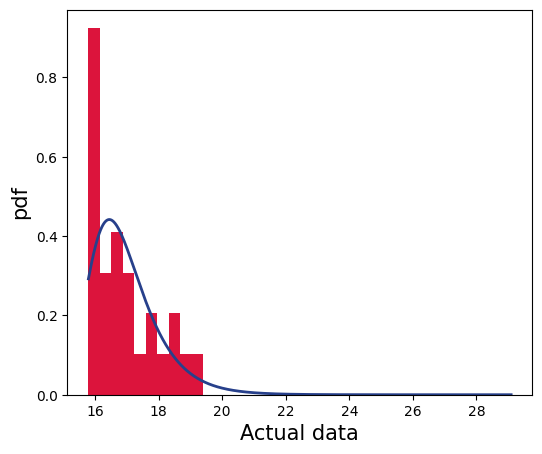

In [9]:
pdf, fig, ax = gumbel_series_1.pdf(plot_figure=True)

#### Calculate and plot the cumulative distribution function (cdf)

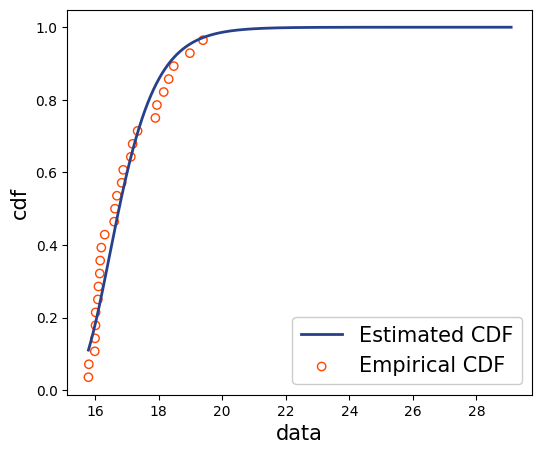

In [10]:
cdf, fig, ax = gumbel_series_1.cdf(plot_figure=True)

#### Calculate the confidence interval

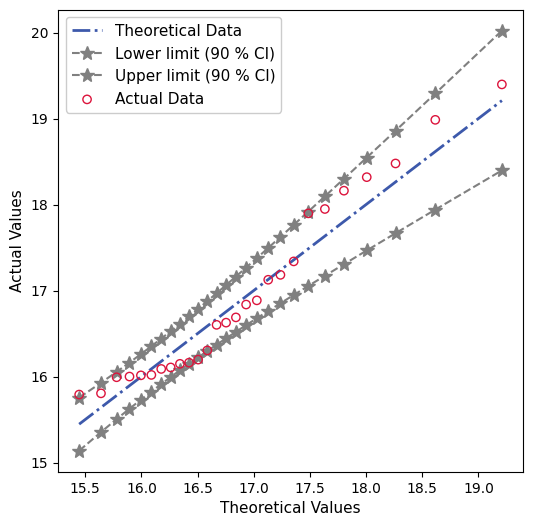

In [11]:
# calculate the confidence interval
upper, lower, fig, ax = gumbel_series_1.confidence_interval(alpha=0.1, plot_figure=True)

#### pdf and cdf plot

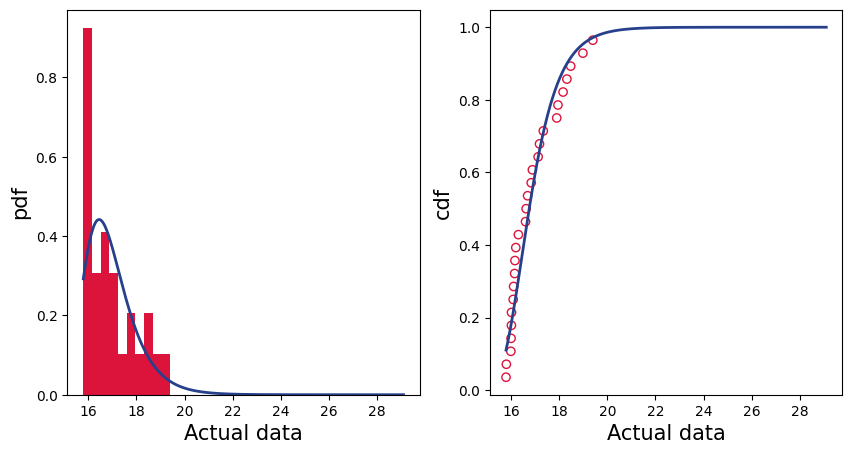

In [12]:
fig, ax = gumbel_series_1.plot()

## Fit distribution by focuing on part of the data

if you want to focus only on high values, you can use a threshold to make the code focus on what is higher
this threshold.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 96
-----KS Test--------
Statistic = 0.2222222222222222
Accept Hypothesis
P value = 0.5256377612776422
{'loc': np.float64(16.607497657735827), 'scale': np.float64(0.8351717220676762)}


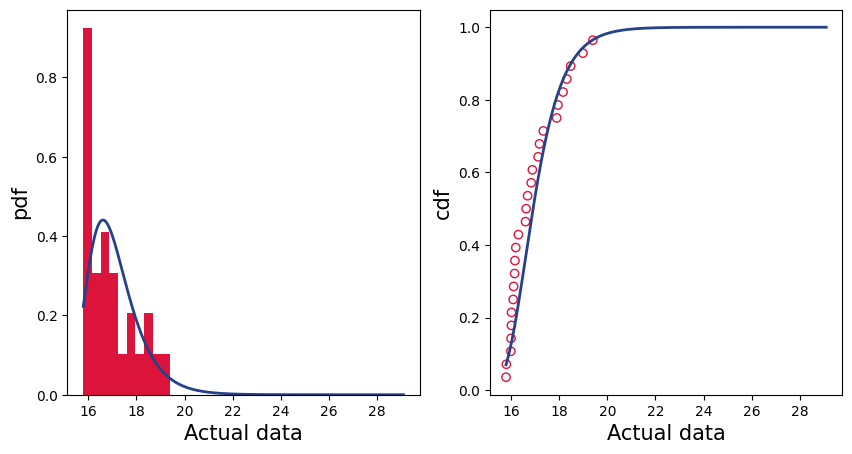

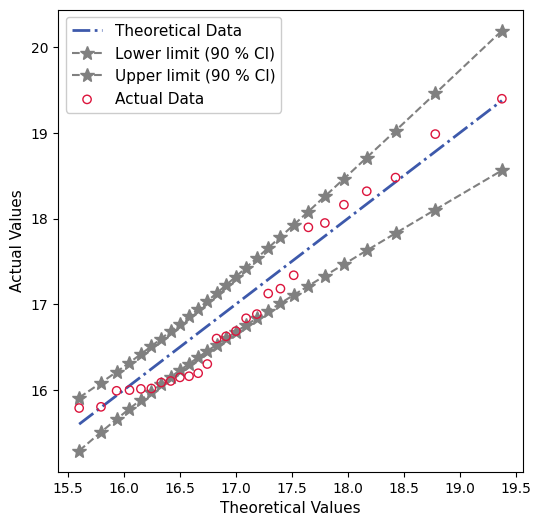

(array([15.91178114, 16.08450282, 16.212135  , 16.32058251, 16.41878046,
        16.51103276, 16.59982545, 16.68678573, 16.77309045, 16.85966884,
        16.94731667, 17.03676873, 17.12875169, 17.22402881, 17.32344449,
        17.42797507, 17.53879392, 17.65736161, 17.78555934, 17.92589793,
        18.08186425, 18.25853443, 18.46374947, 18.71061839, 19.02369257,
        19.45807984, 20.18969779]),
 array([15.29273185, 15.50955483, 15.6605537 , 15.78241539, 15.88766247,
        15.98225498, 16.06957847, 16.1517952 , 16.23041438, 16.30657042,
        16.38117482, 16.45500747, 16.52877752, 16.60316895, 16.67887999,
        16.75666267, 16.83736884, 16.92201008, 17.01184322, 17.10850167,
        17.21421083, 17.33216721, 17.46726308, 17.62762637, 17.82841373,
        18.10353691, 18.5609423 ]),
 <Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Theoretical Values', ylabel='Actual Values'>)

In [13]:
from statista.distributions import Gumbel
threshold = 18
gev_param_mle_series_1 = gumbel_series_1.fit_model(
    method="optimization", obj_func=Gumbel.truncated_distribution, threshold=threshold
)
print(gev_param_mle_series_1)
gumbel_series_1.plot()
gumbel_series_1.confidence_interval(plot_figure=True)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 80
-----KS Test--------
Statistic = 0.37037037037037035
reject Hypothesis
P value = 0.04843826268679447
{'loc': np.float64(17.01925379801025), 'scale': np.float64(0.7486358568895808)}


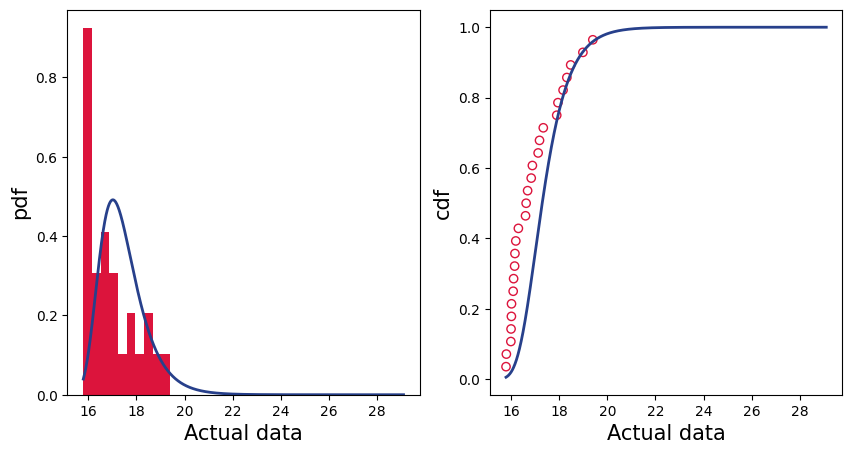

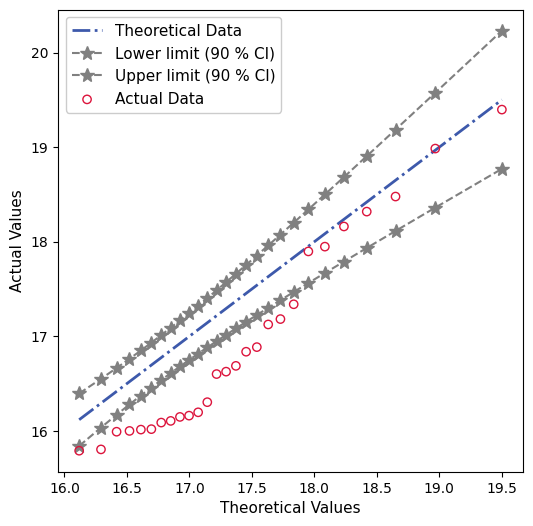

(array([16.39562357, 16.55044879, 16.66485643, 16.7620672 , 16.85009043,
        16.93278406, 17.01237655, 17.09032648, 17.16768878, 17.2452964 ,
        17.32386265, 17.40404618, 17.48649838, 17.57190341, 17.66101819,
        17.75471789, 17.85405431, 17.96033667, 18.07525126, 18.20104874,
        18.3408547 , 18.49921929, 18.68317108, 18.90446082, 19.18509599,
        19.57447445, 20.23028621]),
 array([15.84071674, 16.03507372, 16.17042692, 16.27966198, 16.37400394,
        16.4587953 , 16.53707081, 16.61076871, 16.6812418 , 16.74950698,
        16.81638128, 16.8825638 , 16.9486902 , 17.01537361, 17.08323989,
        17.15296316, 17.225307  , 17.30117819, 17.38170332, 17.46834656,
        17.56310271, 17.66883711, 17.78993509, 17.93368243, 18.11366531,
        18.36028176, 18.77029333]),
 <Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Theoretical Values', ylabel='Actual Values'>)

In [14]:
threshold = 15
gev_param_mle_series_1 = gumbel_series_1.fit_model(
    method="optimization", obj_func=Gumbel.truncated_distribution, threshold=threshold
)
print(gev_param_mle_series_1)
gumbel_series_1.plot()
gumbel_series_1.confidence_interval(plot_figure=True)

# Generalized Extreme Value (GEV)

-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
-----chisquare Test-----
Statistic = -0.30326464715456913
P value = 1.0
{'loc': np.float64(466.7783159128223), 'scale': np.float64(214.7439840776729), 'shape': np.float64(0.005714016754089981)}


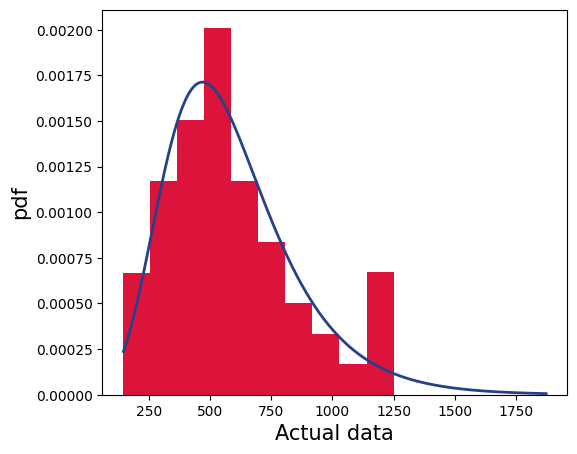

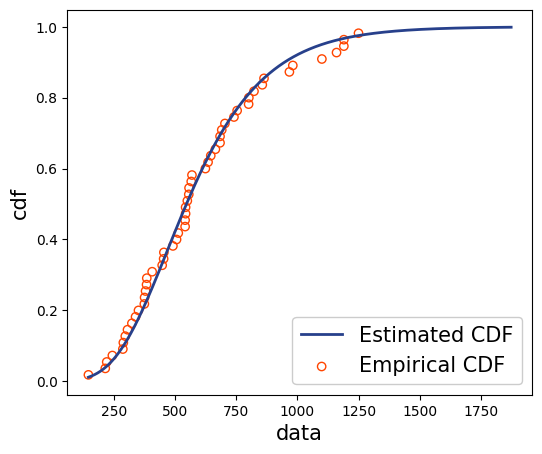

In [14]:
gev_series_2 = Distributions("GEV", time_series2)
# default parameter estimation method is maximum liklihood method
gev_param_mle_series_2 = gev_series_2.fit_model()
gev_series_2.ks()
gev_series_2.chisquare()

print(gev_param_mle_series_2)
# calculate and plot the pdf
pdf, fig, ax = gev_series_2.pdf(plot_figure=True)
cdf, _, _ = gev_series_2.cdf(plot_figure=True)

## Fitting distribution using L moments method

-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
{'loc': np.float64(464.8250207300632), 'scale': np.float64(222.12098731051674), 'shape': np.float64(0.010122582419885787)}


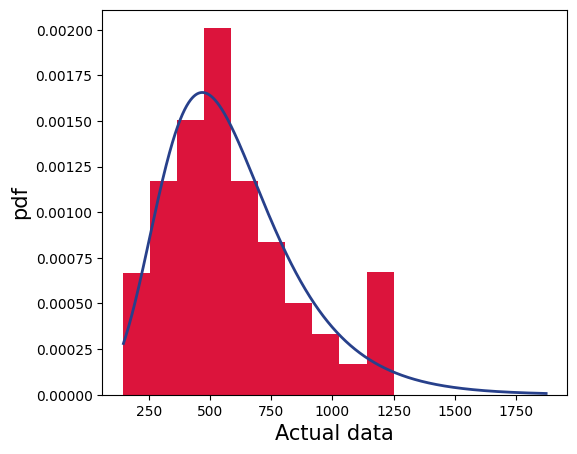

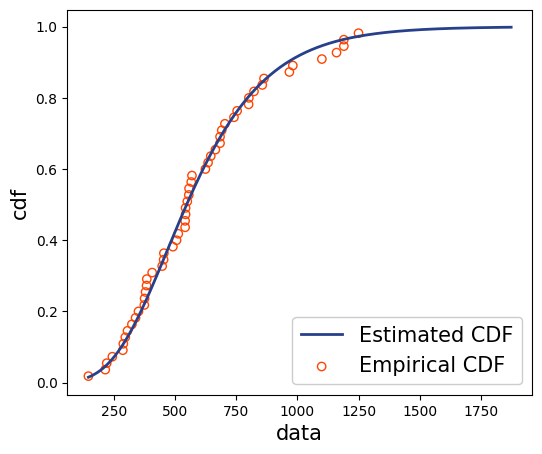

In [17]:
gev_param_lm_series_2 = gev_series_2.fit_model(method="lmoments")
print(gev_param_lm_series_2)
# calculate and plot the pdf
pdf, fig, ax = gev_series_2.pdf(plot_figure=True)
cdf, _, _ = gev_series_2.cdf(plot_figure=True)

2024-08-18 21:40:08.668 | DEBUG    | statista.confidence_interval:boot_strap:110 - Some values used top 10 low/high samples; results may be unstable.


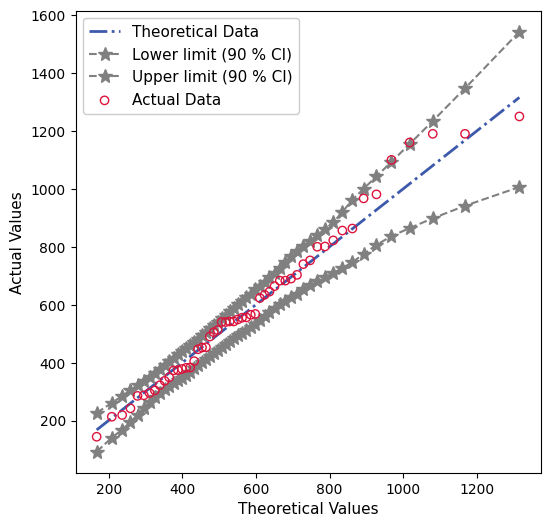

In [15]:
# NBVAL_IGNORE_OUTPUT
from statista.distributions import GEV
# calculate the F (Non Exceedence probability based on weibul)
cdf_Weibul = PlottingPosition.weibul(time_series2)
#T = PlottingPosition.weibul(time_series2)
# inverse_cdf method calculates the theoretical values based on the Gumbel distribution
qth = gev_series_2.inverse_cdf(cdf_Weibul)

upper, lower, fig, ax = gev_series_2.confidence_interval(
    prob_non_exceed=cdf_Weibul,
    alpha=0.1,
    n_samples=100,
    plot_figure=True
)

In [21]:
# NBVAL_IGNORE_OUTPUT
CI = ConfidenceInterval.boot_strap(
    time_series2,
    gevfit=gev_param_lm_series_2,
    n_samples=100,
    F=cdf_Weibul,
    method="lmoments",
    state_function=GEV.ci_func
)
lower_bound = CI["lb"]
upper_bound = CI["ub"]
print(lower_bound)
print(upper_bound)

2024-08-18 21:42:39.355 | DEBUG    | statista.confidence_interval:boot_strap:110 - Some values used top 10 low/high samples; results may be unstable.


[ 248.55080779  279.26333781  300.94886892  318.60283258  333.93567222
  347.75848368  360.52667037  372.52471064  383.944131    396.22426951
  408.21605493  419.82552089  431.13010658  442.1926571   450.68191758
  462.13004273  473.4350262   484.63412476  495.99946577  507.74044479
  519.47195194  531.22234306  543.01892712  554.88844149  566.85748211
  578.9529084   591.20223973  603.63405917  616.27843962  629.16740878
  642.3354712   655.82020926  669.6629901   683.9098131   698.61234325
  713.82919118  729.62752297  746.08511561  763.29302255  781.35908789
  800.41266272  820.61106033  844.85576736  872.29856827  904.66993395
  941.80448176  972.26172561 1006.23101288 1044.6869703  1103.20900569
 1180.20002711 1282.67461257 1420.73221677 1688.41484047]
[  66.92146073  117.64238867  148.18532433  172.37671098  194.01345764
  213.3162537   230.85712961  247.09388698  258.65307347  274.32450482
  289.33387811  303.81041049  316.85462343  329.43634659  341.74795137
  353.21120288  362

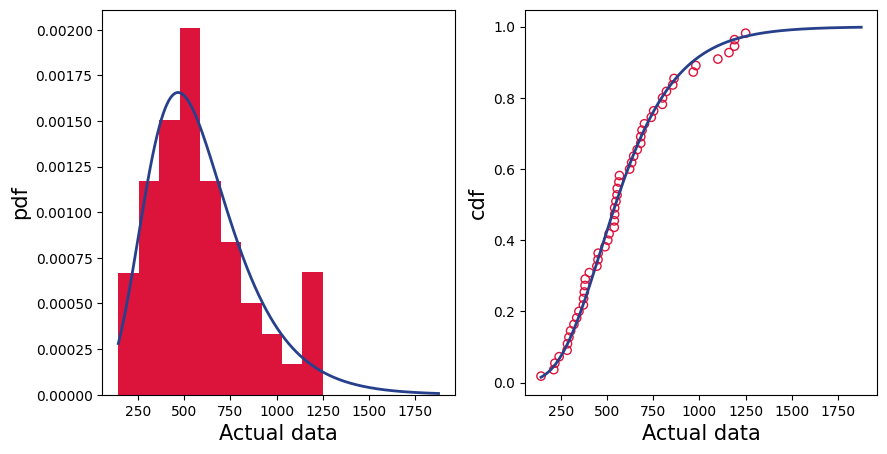

2024-08-18 21:43:52.365 | DEBUG    | statista.confidence_interval:boot_strap:110 - Some values used top 10 low/high samples; results may be unstable.


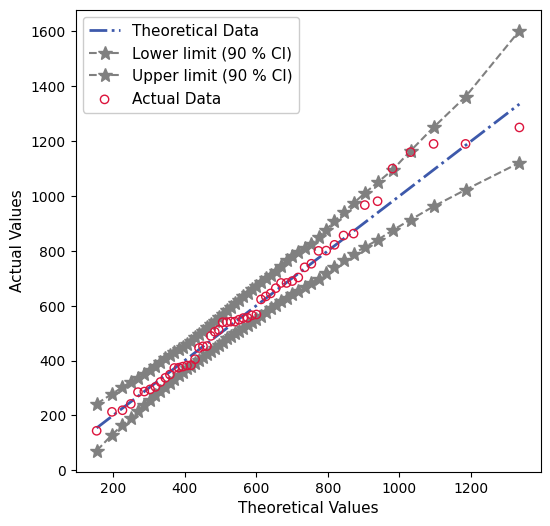

In [24]:
# NBVAL_IGNORE_OUTPUT
fig, ax = gev_series_2.plot()
upper_bound, lower_bound, fig, ax = gev_series_2.confidence_interval(plot_figure=True)